# Q1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


## A

In [2]:
finance = pd.read_csv("finance_popularity.csv")

In [3]:
finance["month"] = pd.date_range(start = '2004-01-01', end = '2020-01-01', freq='MS')
finance.set_index("month", inplace = True)

Text(0, 0.5, 'Relative Search Interest')

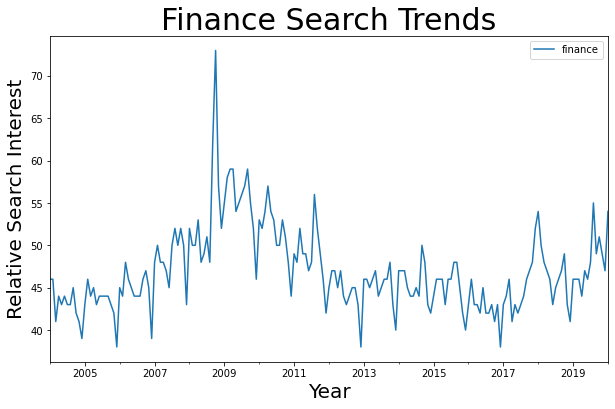

In [4]:
finance.plot(figsize = (10,6))
plt.title("Finance Search Trends",fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Relative Search Interest', fontsize=20)

there seems to be a seasonality of 12 months according to the local bottom then a local peak at the start of each year, thus the data is not stationary

## B

Text(0, 0.5, 'Relative Search Interest')

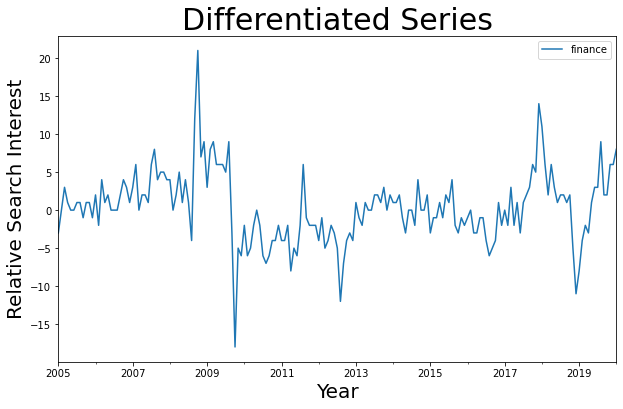

In [5]:
finance_year_diff=finance.diff(periods=12)
finance_year_diff=finance_year_diff.dropna() #remove 12 first NaNs

finance_year_diff.plot(figsize = (10,6))
plt.title("Differentiated Series",fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Relative Search Interest', fontsize=20)

we removed the yearly seasonality and also we can see that there is no trend as the data is disributed around 0 therefore the data is stationary

## C

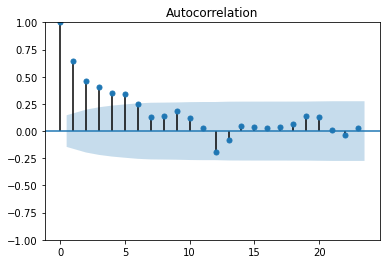

In [6]:
tsaplots.plot_acf(finance_year_diff);

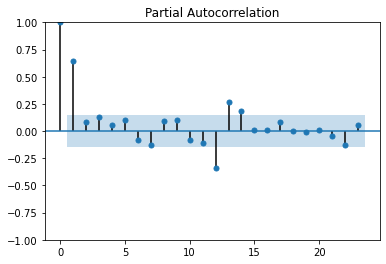

In [7]:
tsaplots.plot_pacf(finance_year_diff);

the pacf is around zero at 3 or more lags, thus we can assume that a good model would be $AR(2)$ or $SARIMA(2,0,0)(1,1,0)_{12}$

## D

### $SARIMA(2,0,0)(1,1,0)_{12}$

In [8]:
sarima_model = SARIMAX(finance, order=(2, 0, 0),seasonal_order=(1, 1, 0,12))                             
sarima_model_fit = sarima_model.fit(disp=False)
sarima_model_fit.summary()

C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            finance   No. Observations:                  193
Model:             SARIMAX(2, 0, 0)x(1, 1, 0, 12)   Log Likelihood                -464.106
Date:                            Tue, 13 Feb 2024   AIC                            936.212
Time:                                    23:31:11   BIC                            949.006
Sample:                                01-01-2004   HQIC                           941.399
                                     - 01-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5935      0.044     13.570      0.000       0.508       0.679
ar.L2          0.1923      0.063      3.075      0.002       0.070       0.315
ar.S.L12      -0.4594      0.044    -10.479      0.000      -0.545      -0.373
sigma2         9.6836      0.661     14.648      0.000       8.388      10.979
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):               175.39
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                             0.76
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### $AR(2)$

In [9]:
arima_model = SARIMAX(finance, order=(2, 0, 0))                             
arima_model_fit = arima_model.fit(disp=False)
arima_model_fit.summary()

C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                finance   No. Observations:                  193
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -514.193
Date:                Tue, 13 Feb 2024   AIC                           1034.386
Time:                        23:31:11   BIC                           1044.174
Sample:                    01-01-2004   HQIC                          1038.350
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8166      0.038     21.481      0.000       0.742       0.891
ar.L2          0.1813      0.039      4.674      0.000       0.105       0.257
sigma2        11.7378      0.776     15.125      0.000      10.217      13.259
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):                66.56
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## E

the $SARIMA(2,0,0)(1,1,0)_{12}$ model has a better AIC and BIC so we will choose this as our model, lets try to forcast the last year data (without fitting on it) to check how the model works.

C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


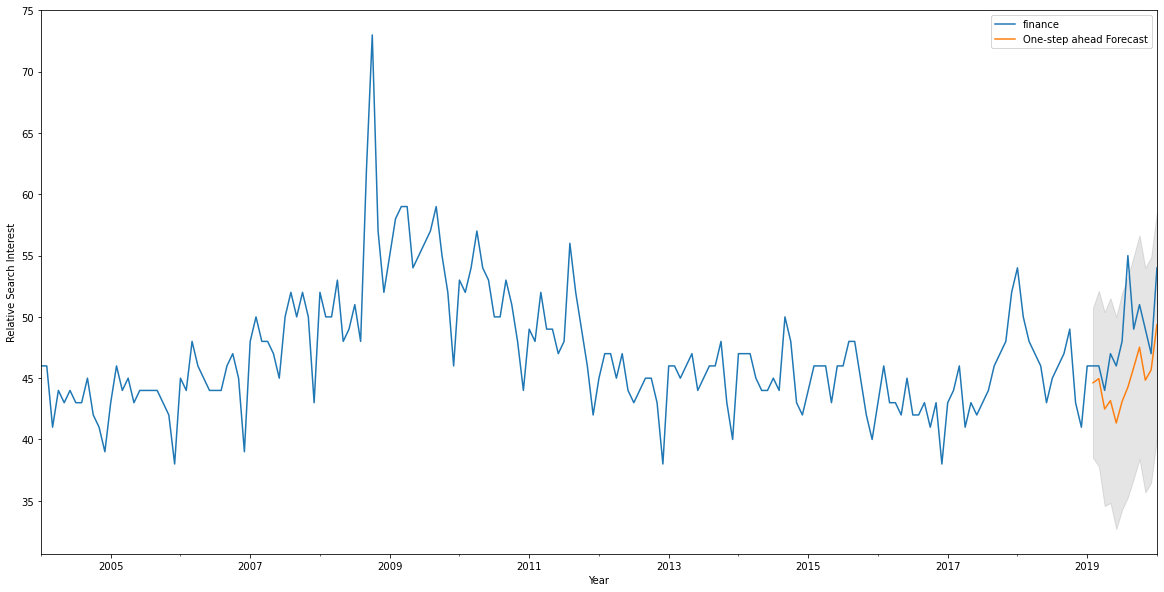

In [10]:
FORECAST = 12
sarima_model_check = SARIMAX(finance[:-FORECAST], order=(2, 0, 0),seasonal_order=(1, 1, 0,12))                             
sarima_model_check_fit = sarima_model_check.fit(disp=False)

next24m = sarima_model_check_fit.get_forecast(steps=FORECAST)
next24m_ci = next24m.conf_int() 

futureDates = pd.date_range(start = finance.index[-FORECAST], periods=FORECAST, freq='MS')
next24m_ci.index = futureDates
 
futureDF_forecast = pd.DataFrame(next24m.predicted_mean, index=futureDates)

ax = finance.plot(label='observed', figsize=(20, 10))
next24m.predicted_mean.plot(ax=ax, label='One-step ahead Forecast')

ax.fill_between(next24m_ci.index,
                next24m_ci.iloc[:, 0],
                next24m_ci.iloc[:, 1], color='k', alpha=.1)

ax.set_xlabel('Year')
ax.set_ylabel('Relative Search Interest')
plt.legend()
plt.show()

a one data sample for checking the model is rather low, lets create a loop to try several years

C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


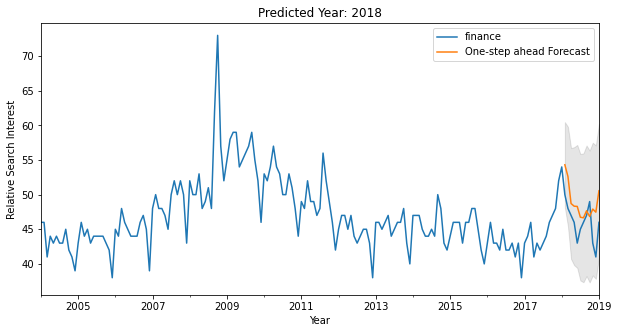

C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


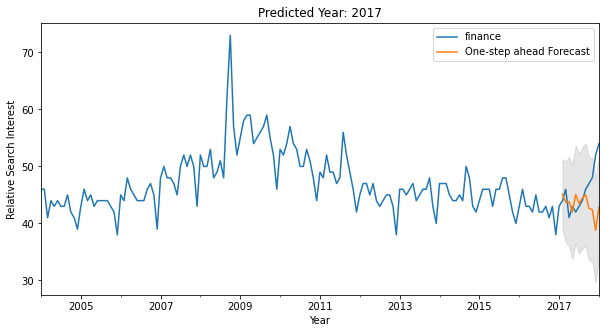

C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


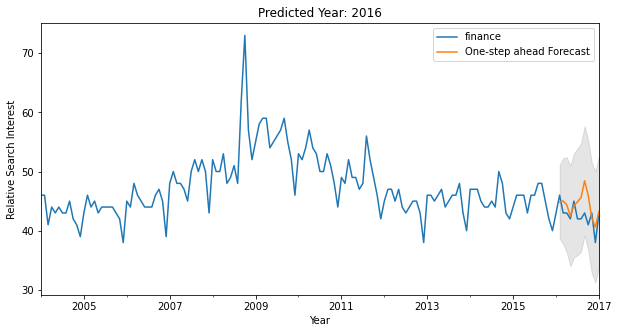

C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


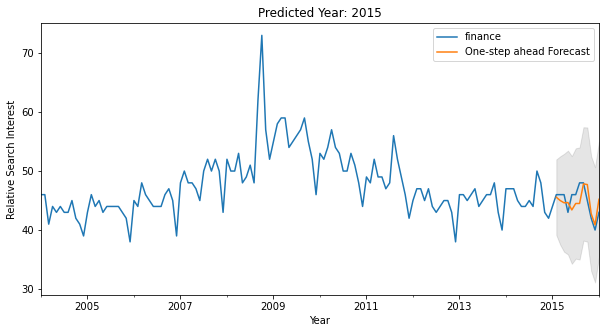

C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


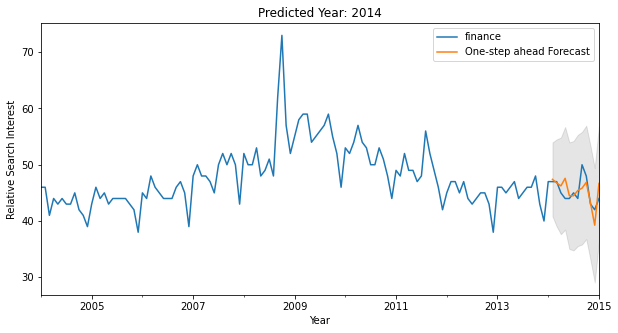

C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


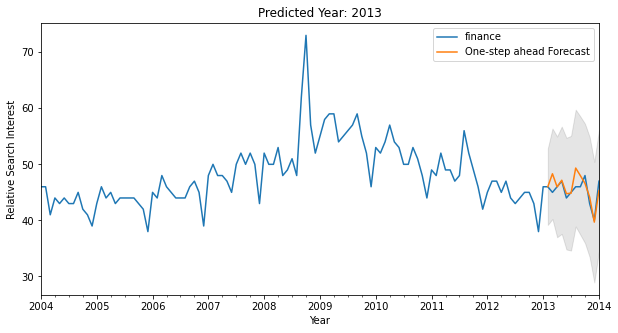

C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


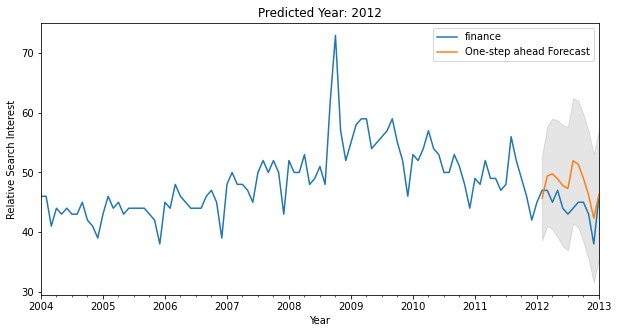

C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


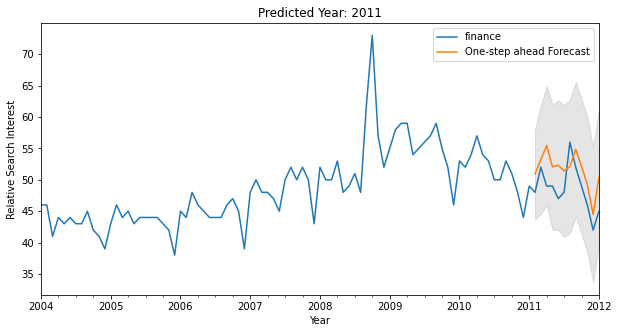

In [11]:
FORECAST = 12
OFFSET = 12
for year, OFFSET in zip(range(2018, 2010, -1), range(12, 9*12,12)):
    sarima_model_check = SARIMAX(finance[:-FORECAST - OFFSET], order=(2, 0, 0),seasonal_order=(1, 1, 0,12))                             
    sarima_model_check_fit = sarima_model_check.fit(disp=False)

    next24m = sarima_model_check_fit.get_forecast(steps=FORECAST)
    next24m_ci = next24m.conf_int() 

    futureDates = pd.date_range(start = finance.index[-FORECAST- OFFSET], periods=FORECAST, freq='MS')
    next24m_ci.index = futureDates

    futureDF_forecast = pd.DataFrame(next24m.predicted_mean, index=futureDates)

    ax = finance[:- OFFSET].plot(label='observed', figsize=(10, 5))
    next24m.predicted_mean.plot(ax=ax, label='One-step ahead Forecast')

    ax.fill_between(next24m_ci.index,
                    next24m_ci.iloc[:, 0],
                    next24m_ci.iloc[:, 1], color='k', alpha=.1)
    
    ax.set_title(f"Predicted Year: {year}")
    ax.set_xlabel('Year')
    ax.set_ylabel('Relative Search Interest')
    plt.legend()
    plt.show()

the model seem to work quite well, i tried some different models but did not get much better AIC, BIC and plots

# Q2

## A

In [12]:
baseball = pd.read_csv("baseball_popularity.csv")

Text(0, 0.5, 'Relative Search Interest')

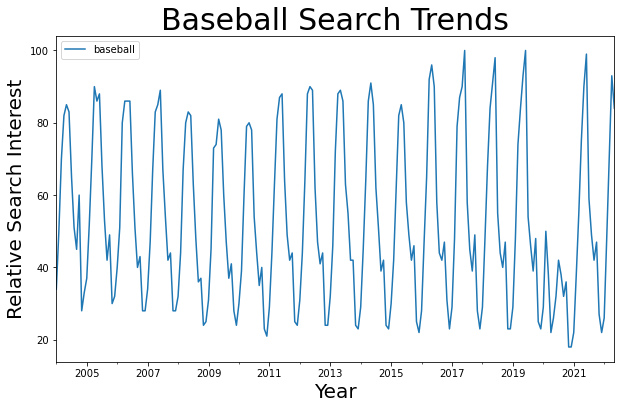

In [13]:
baseball["month"] = pd.date_range(start = '2004-01-01', end = '2022-05-01', freq='MS')
baseball.set_index("month", inplace = True)
baseball.plot(figsize = (10,6))
plt.title("Baseball Search Trends",fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Relative Search Interest', fontsize=20)

this time series also looks seasonal without a trend, thus it is not stationary. baseball season usually starts at march\april and ends at october, so we can expect a 12 month seasonality

taking a look at the first 2 years

Text(0, 0.5, 'Relative Search Interest')

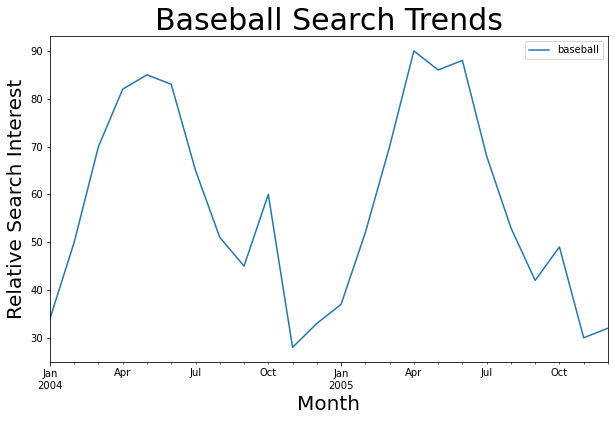

In [14]:
baseball[:24].plot(figsize = (10,6))
plt.title("Baseball Search Trends",fontsize=30)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Relative Search Interest', fontsize=20)

we can see a peak at the start of the season that a slowly decays, until another local peak at october probably due to the finals.

## B

Text(0, 0.5, 'Relative Search Interest')

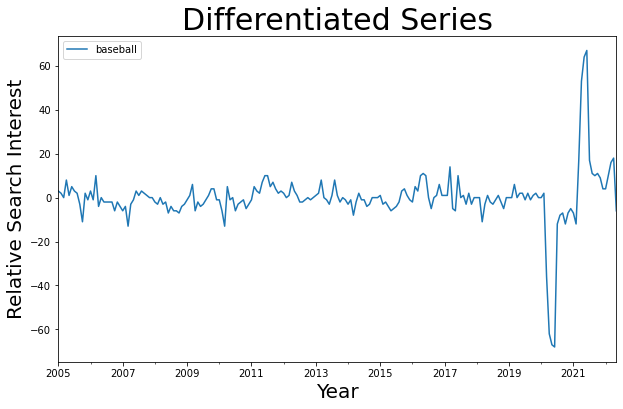

In [15]:
baseball_year_diff =baseball.diff(periods=12).dropna() #remove 12 first NaNs

baseball_year_diff.plot(figsize = (10,6))
plt.title("Differentiated Series",fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Relative Search Interest', fontsize=20)

looks stationary, except for the major noise at 2020-2021 (corona)?

## C

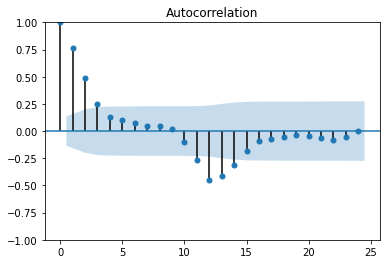

In [16]:
tsaplots.plot_acf(baseball_year_diff);

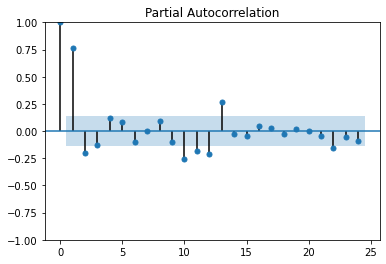

In [17]:
tsaplots.plot_pacf(baseball_year_diff);

the graphs suggests a strong correlation between the last 2 lags and maybe the third lag but also for the lags a year ago, so we can assume that a good model would be $AR(2)$ or $AR(3)$ $SARIMA(2,0,0)(1,1,0)_{12}$ or $SARIMA(2,0,0)(2,1,0)_{12}$, or even maybe Holt Winter’s Exponential Smoothing with 12 months seasonality

## D

In [18]:
def fit_plot_sarima(order, seasonal_order = (0,0,0,0)):
    sarima_model = SARIMAX(finance, order=order,seasonal_order=seasonal_order)                             
    sarima_model_fit = sarima_model.fit(disp=False)
    display(sarima_model_fit.summary())

### $SARIMA(2,0,0)(1,1,0)_{12}$

In [19]:
fit_plot_sarima((2,0,0), (1,1,0,12))

C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            finance   No. Observations:                  193
Model:             SARIMAX(2, 0, 0)x(1, 1, 0, 12)   Log Likelihood                -464.106
Date:                            Tue, 13 Feb 2024   AIC                            936.212
Time:                                    23:31:15   BIC                            949.006
Sample:                                01-01-2004   HQIC                           941.399
                                     - 01-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5935      0.044     13.570      0.000       0.508       0.679
ar.L2          0.1923      0.063      3.075      0.002       0.070       0.315
ar.S.L12      -0.4594      0.044    -10.479      0.000      -0.545      -0.373
sigma2         9.6836      0.661     14.648      0.000       8.388      10.979
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):               175.39
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                             0.76
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### $SARIMA(2,0,0)(2,1,0)_{12}$

In [20]:
fit_plot_sarima((2,0,0), (2,1,0,12))

C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            finance   No. Observations:                  193
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 12)   Log Likelihood                -462.502
Date:                            Tue, 13 Feb 2024   AIC                            935.004
Time:                                    23:31:15   BIC                            950.996
Sample:                                01-01-2004   HQIC                           941.487
                                     - 01-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6085      0.042     14.511      0.000       0.526       0.691
ar.L2          0.1956      0.061      3.212      0.001       0.076       0.315
ar.S.L12      -0.5322      0.053    -10.134      0.000      -0.635      -0.429
ar.S.L24      -0.1388      0.062     -2.246      0.025      -0.260      -0.018
sigma2         9.4814      0.629     15.063      0.000       8.248      10.715
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):               198.57
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                             0.93
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### $AR(2)$

In [21]:
fit_plot_sarima((2,0,0))

C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                finance   No. Observations:                  193
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -514.193
Date:                Tue, 13 Feb 2024   AIC                           1034.386
Time:                        23:31:15   BIC                           1044.174
Sample:                    01-01-2004   HQIC                          1038.350
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8166      0.038     21.481      0.000       0.742       0.891
ar.L2          0.1813      0.039      4.674      0.000       0.105       0.257
sigma2        11.7378      0.776     15.125      0.000      10.217      13.259
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):                66.56
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### $AR(3)$

In [22]:
fit_plot_sarima((3,0,0))

C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                finance   No. Observations:                  193
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -505.692
Date:                Tue, 13 Feb 2024   AIC                           1019.384
Time:                        23:31:15   BIC                           1032.435
Sample:                    01-01-2004   HQIC                          1024.669
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7647      0.041     18.556      0.000       0.684       0.845
ar.L2         -0.0604      0.073     -0.825      0.409      -0.204       0.083
ar.L3          0.2943      0.058      5.036      0.000       0.180       0.409
sigma2        10.7337      0.829     12.944      0.000       9.108      12.359
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):                52.74
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                             0.62
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Prophet

In [23]:
baseball_prophet = baseball.reset_index().rename({"month": "ds", "baseball": "y"}, axis =1)
m = Prophet()
m.fit(baseball_prophet)

23:31:15 - cmdstanpy - INFO - Chain [1] start processing
23:31:16 - cmdstanpy - INFO - Chain [1] done processing


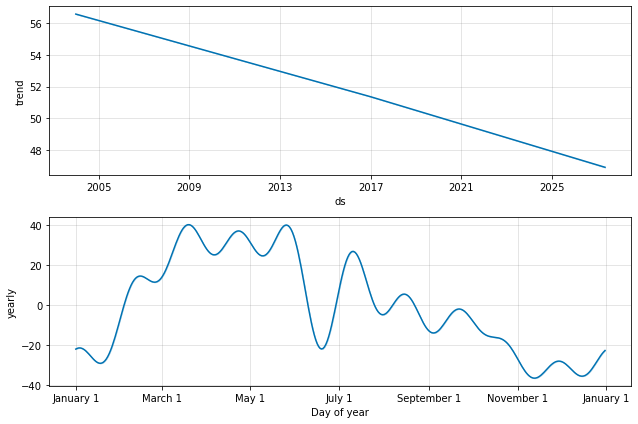

In [24]:
future_dates = m.make_future_dataframe(periods=60, freq='MS')
forecast = m.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
m.plot_components(forecast);

we can see that there is indeed yearly seasonality April-June seem to be the time when people usually search baseball. we also see a linear decreasing trend

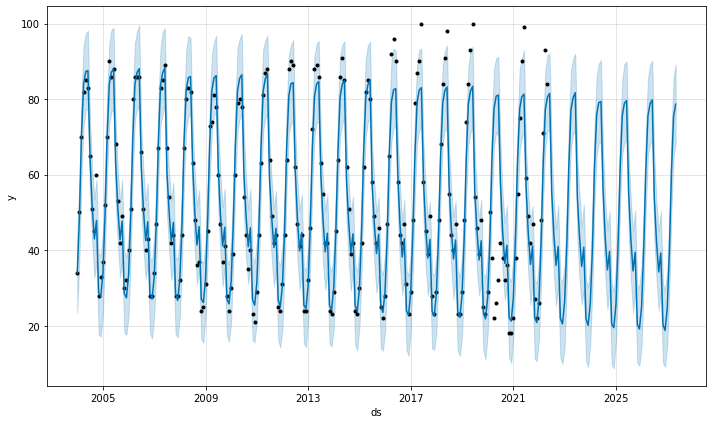

In [25]:
m.plot(forecast);

In [26]:
SES=ExponentialSmoothing(baseball, seasonal_periods=12, trend='add', seasonal='add')
ses_fit=SES.fit()
ses_fit.summary()

C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Dep. Variable:,baseball,No. Observations:,221
Model:,ExponentialSmoothing,SSE,8092.181
Optimized:,True,AIC,827.708
Trend:,Additive,BIC,882.079
Seasonal:,Additive,AICC,831.095
Seasonal Periods:,12,Date:,"Tue, 13 Feb 2024"
Box-Cox:,False,Time:,23:31:17
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9999989,alpha,True
smoothing_trend,7.4008e-06,beta,True


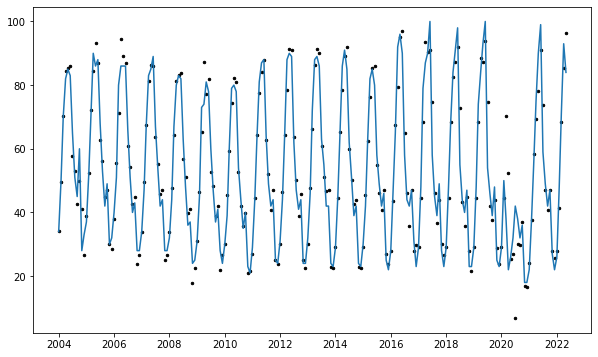

In [27]:
fig,ax = plt.subplots(figsize=(10, 6))
ax.plot(baseball.index, baseball["baseball"])
ax.scatter(baseball.index, ses_fit.fittedvalues, color = "black", s=6)

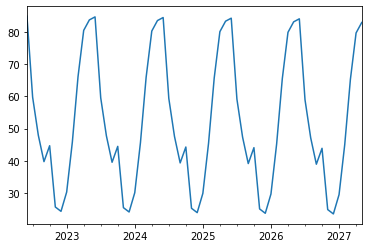

In [28]:
forecast_data = ses_fit.forecast(60)
forecast_data.plot(label="HW forecast")

In [32]:
ets_model = ETSModel(
    endog=baseball["baseball"],
    seasonal='add',
    trend = 'add',
    seasonal_periods=12,
)
ets_result = ets_model.fit()

# Simulate predictions.
n_steps_prediction = baseball["baseball"].shape[0]
n_repetitions = 500

df_simul = ets_result.simulate(
    nsimulations=n_steps_prediction+60,
    repetitions=n_repetitions,
    anchor='start',
)

# Calculate confidence intervals.
upper_ci = df_simul.quantile(q=0.9, axis='columns')
lower_ci = df_simul.quantile(q=0.1, axis='columns')

C:\Users\Nir\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


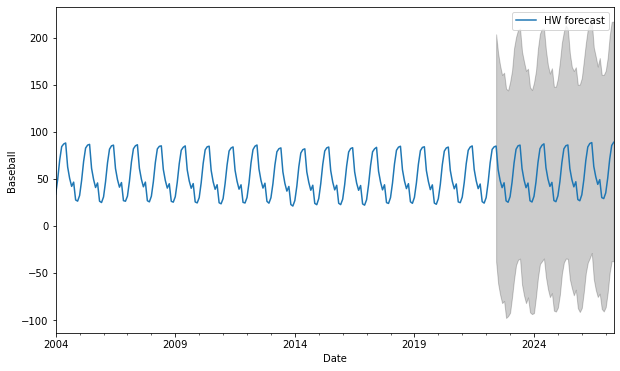

In [38]:
ax = df_simul.mean(axis = 1).plot(label="HW forecast", figsize = (10.,6))

ax.fill_between(df_simul.index[-60:],
                upper_ci[-60:],
                lower_ci[-60:], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Baseball')
plt.legend()
plt.show()

## E

## F